In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('netflix1.csv')

In [3]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
data.shape

(8790, 10)

In [6]:
data = data.drop_duplicates()
data['date_added'] = pd.to_datetime(data['date_added'])

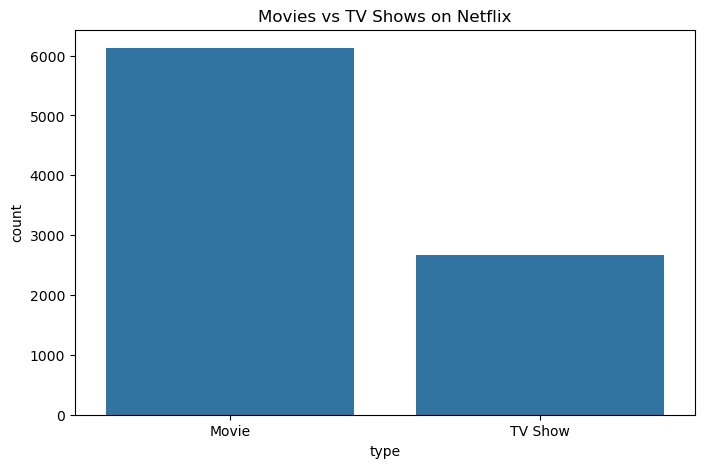

In [7]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'type', data = data)
plt.title('Movies vs TV Shows on Netflix')
plt.show()

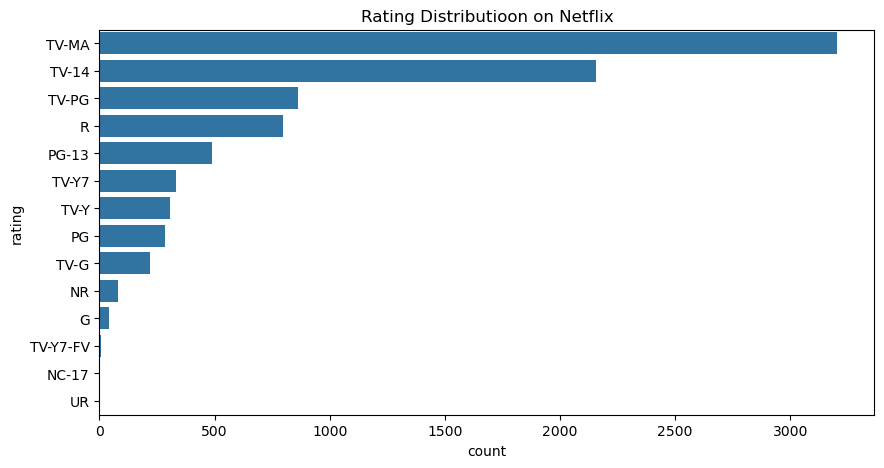

In [8]:
plt.figure(figsize = (10,5))
sns.countplot(y = 'rating', data = data, order = data['rating'].value_counts().index)
plt.title('Rating Distributioon on Netflix')
plt.show()

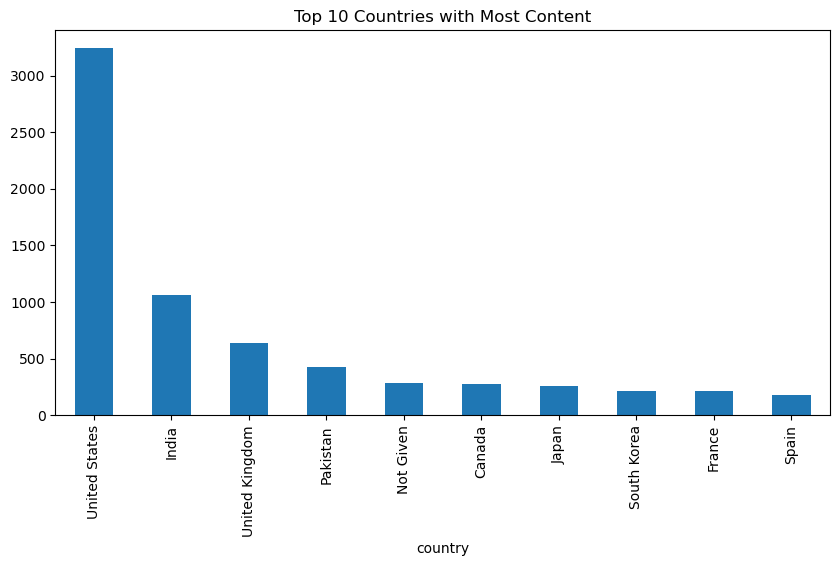

In [9]:
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries with Most Content")
plt.show()

In [10]:
data['genres'] = data['listed_in'].str.split(', ')
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

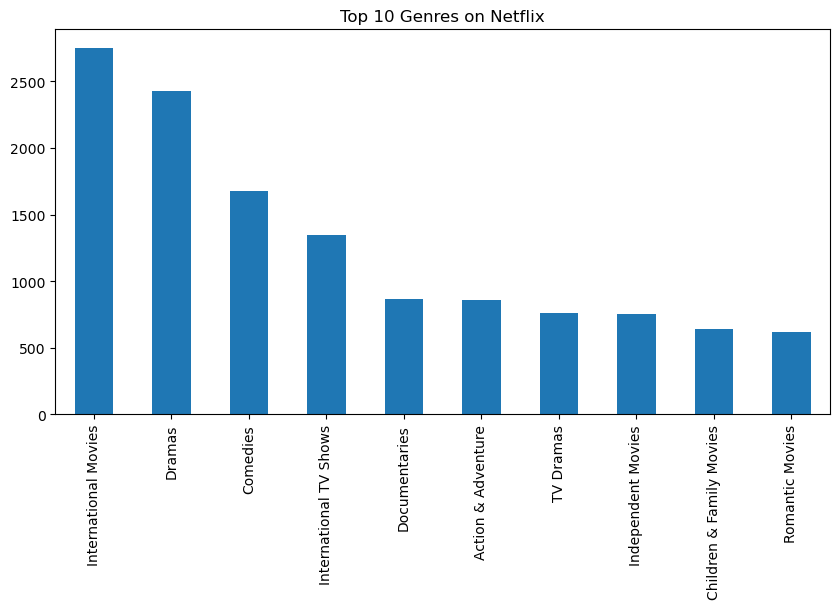

In [11]:
plt.figure(figsize=(10,5))
genre_counts.plot(kind='bar')
plt.title("Top 10 Genres on Netflix")
plt.show()

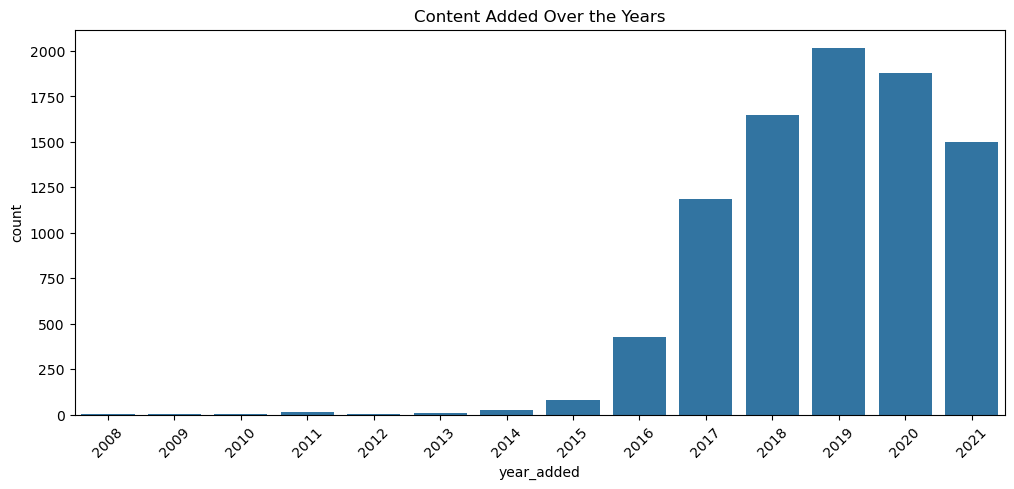

In [12]:
data['year_added'] = data['date_added'].dt.year
plt.figure(figsize=(12,5))
sns.countplot(x='year_added', data=data)
plt.xticks(rotation=45)
plt.title("Content Added Over the Years")
plt.show()